## The pancreatic $\beta$-cell

Pancreatic $\beta$-cells secrete insulin, a hormone used to maintain blood plasma glocose levels. Electrical activity and $Ca^{2+}$ concentrations have been found to be linked to insuling secretion.

The Chay-Keizer model is a system of coupled ODEs which govern the flow of ions through the cell membrane and can be used to model the electrical activity and ion concentration in pancreatic $\beta$-cells.

### Chay-Keizer model

This model used modified Morris-Lecar equations to model the rich phenomena found in pancreatic $\beta$-cells such as spiking and bursting behaviour.

$$
C_m\frac{dV}{dt} = -g_{Ca}m_{\infty}(V-V_{Ca}) - g_Kw(V-V_K) - g_L(V-V_L) - I_{K(Ca)} \\
\\
\frac{dw}{dt} = \frac{\phi (w_{\infty}- w)}{\tau} \\
\\
\frac{[Ca^{2+}]_i}{dt} = f_i(-\alpha g_{Ca}m_{\infty}(V-V_{Ca}) - v_{LPM}[Ca^{2+}]_i)

$$

The K(Ca) current from the 1st equation is of the form:

$$
I_{K(Ca)} = g_{K(Ca)}\frac{[Ca^{2+}]_i}{K_{K(Ca)}+ [Ca^{2+}]_i}(V-V_K)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy import optimize
from numpy import linalg as LA

The values of the parameters used in the above ODEs is found below.

In [35]:
param_dict = {
    "Cm": 5300,
    "g_Ca":1000,
    "V_Ca":25,
    "g_K":2700,
    "V_K":-75,
    "v1":-20,
    "v2":24,
    "v3":-16,
    "v4":11.2,
    "phi":0.035,
    "g_L":150,
    "V_L":-75,
    "g_KCa":2000,
    "K_KCa":5,
    "f":0.001,
    "alpha":4.5e-6,
    "f_i":0.004,
    "vLPM":0.18,
    "Cai":0.2,
    "w":0.1,
}



In [4]:
Cm = 5300 #fF
g_Ca = 1000 #pS
V_Ca = 25 #mV
g_K = 2700 #pS
V_K = -75 #mV
I_app = 0
v1 = -20 #mV
v2 = 24
v3 = -16 #mV
v4 = 11.2 #mV
phi = 0.035 #/ms
g_L = 150 #pS
V_L = -75 #mV
g_KCa = 2000 #pS
K_KCa = 5 #micro M
f = 0.001 
alpha = 0.0000045 #micro M /(fA * ms)


f_i = 0.004
vLPM = 0.18 #/ms

In [5]:
from CK_functions import chay_Keizer # still can't get my function import to work #help
#of course better documentation for these functions can be found in Function_bank.py


## Solving the Chay-Keizer model

Using ivp_solve to find numerical solutions for the Chay-Keizer model.

In [23]:
f_i = 0.001

vLPM = 0.15 #/ms
alpha = 4.5e-06

param_dict["vLPM"] = vLPM


sol=solve_ivp(chay_Keizer, t_span=[0, 10000], y0 =[-70, 0.01, 0.1], method="LSODA", dense_output=True, args=(param_dict,), rtol=1e-7, atol=1e-7, max_step=0.1)

print(sol.message)




The solver successfully reached the end of the integration interval.


I then plotted the time series for all 3 variables, $V$, $w$, $[Ca^{2+}]_i$. I would expect to see some bursting behaviour in the 1st graph (V vs. t) but all I get is a plateau or slow decrease of the voltage. There could be something wrong with the initial parameters that I used or a mistake in how I defined the function, however, I used the same parameter values as they used in the "Computational Cell Biology" textbook.

The third graph also isn't exhibiting the behaviour I would expect; I would expect slow oscillations of the calcium concentration, but what I see is merely a slow rise in the concentration. This behaviour doesn't change even when I increase the time scale by a factor of 10, we still only see a steady slow rise.

In summary, I do not know what is wrong with my code, any insight would be greatly appreciated.

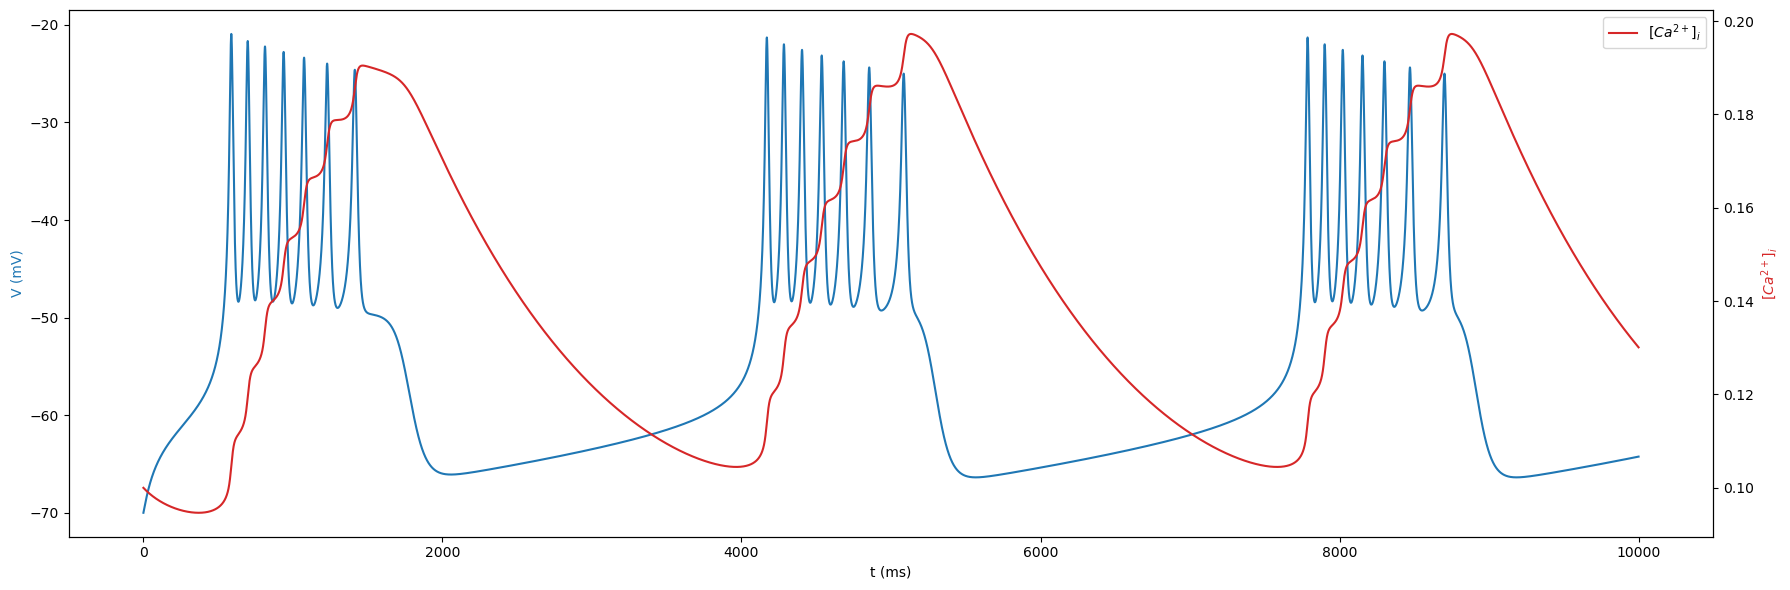

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 6))

vLPM = [0.10, 0.15, 0.18, 0.20]

col="tab:blue"
ax1.plot(sol.t, sol.y[0, :], label="V (mV)", color=col)
ax1.set_xlabel("t (ms)")
ax1.set_ylabel("V (mV)", color=col)

col="tab:red"
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.plot(sol.t, sol.y[2, :], label="$[Ca^{2+}]_i$", color=col)
ax2.set_ylabel('$[Ca^{2+}]_i$', color=col)  # we already handled the x-label with ax1
plt.legend()


plt.tight_layout()
plt.show()

In [176]:
param_dict["f_i"] = 0.001

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


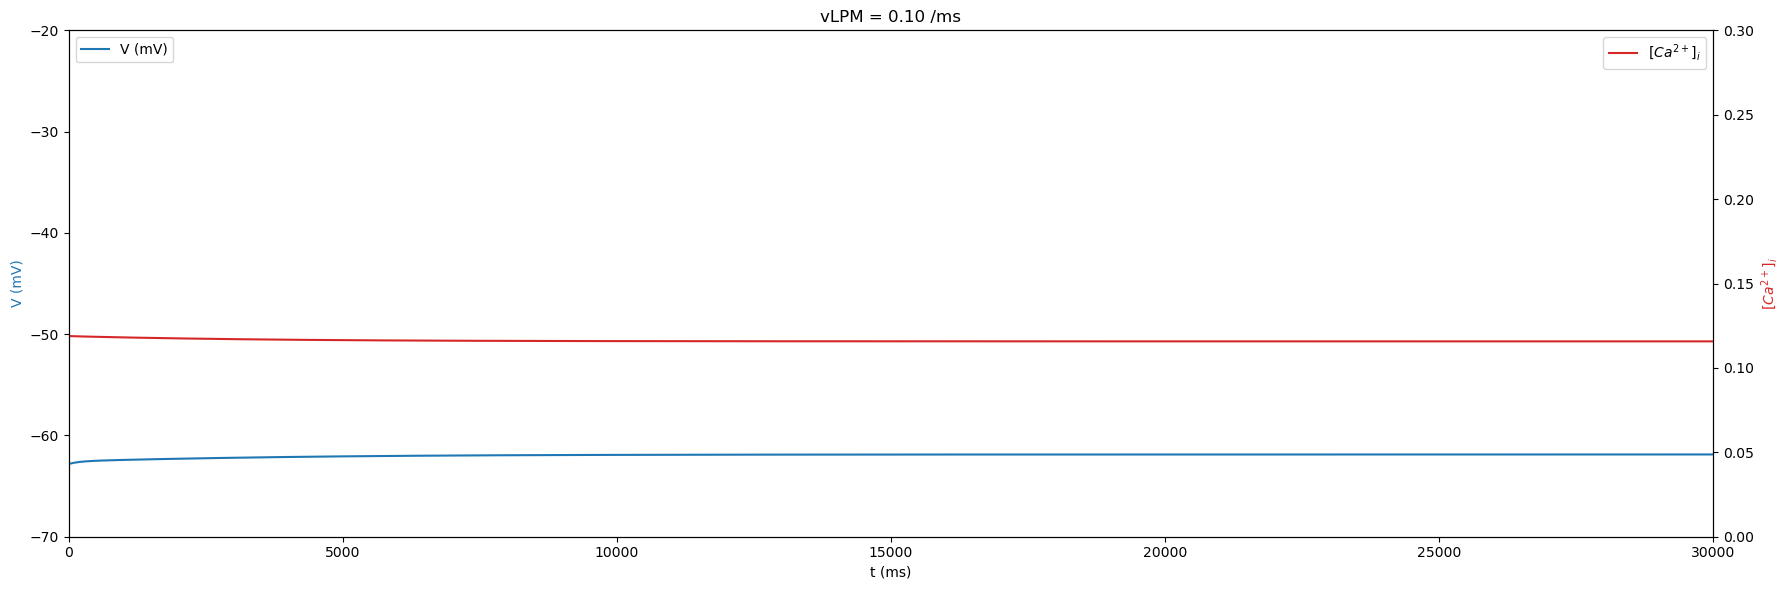

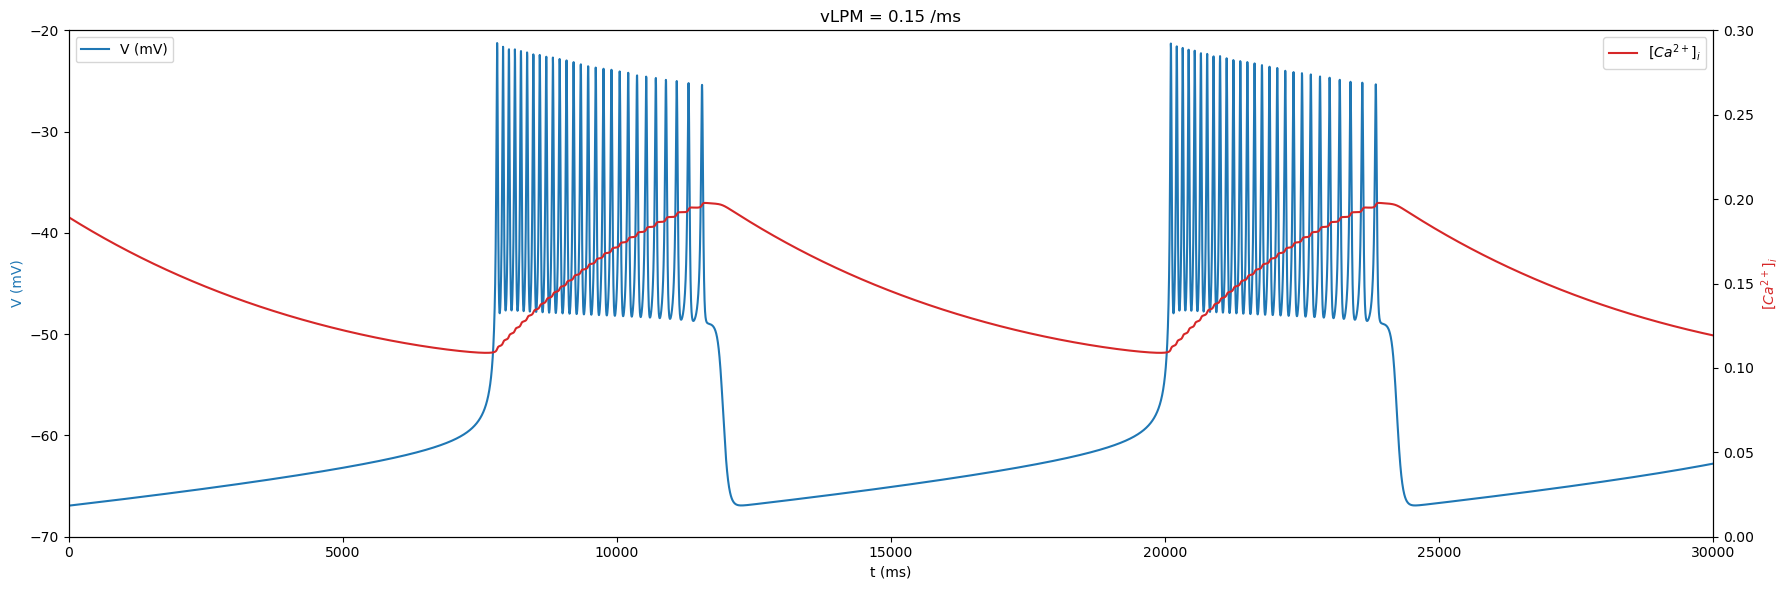

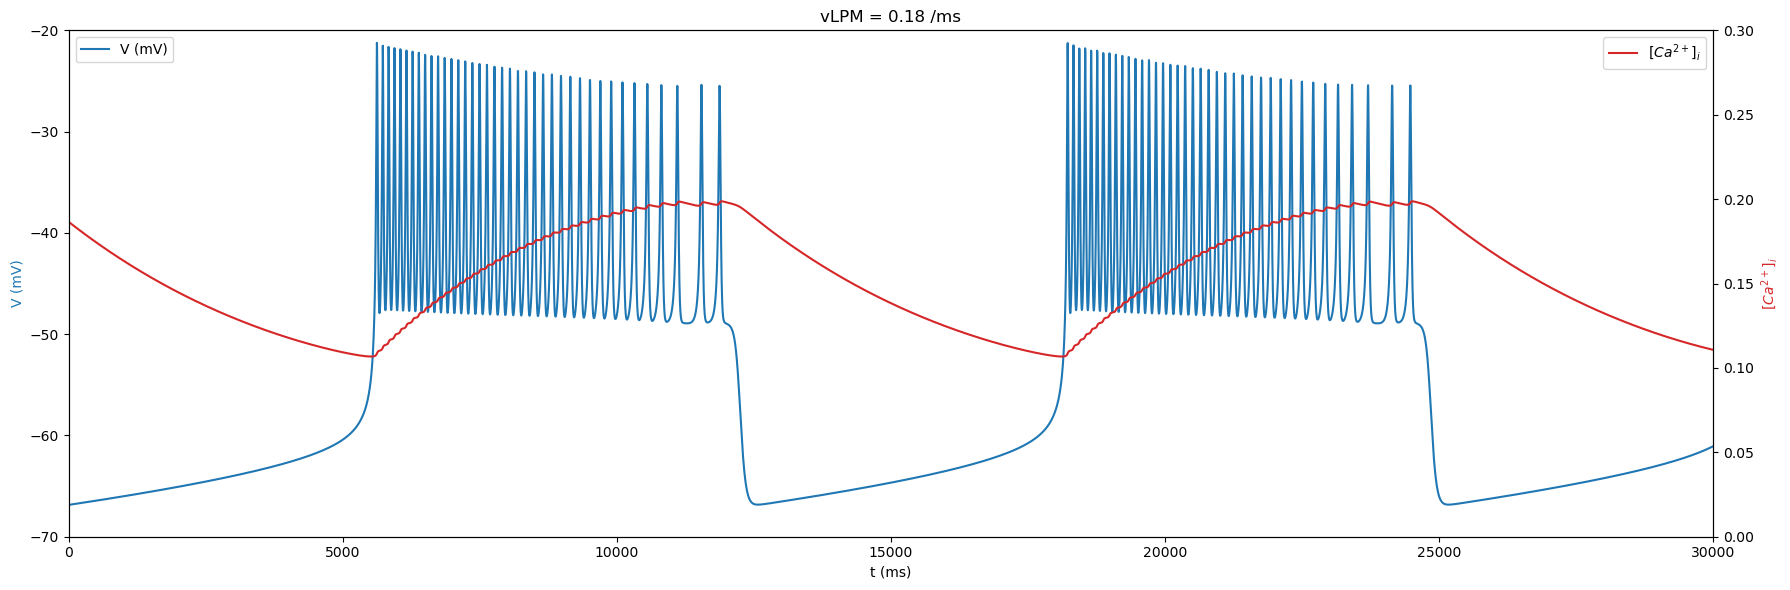

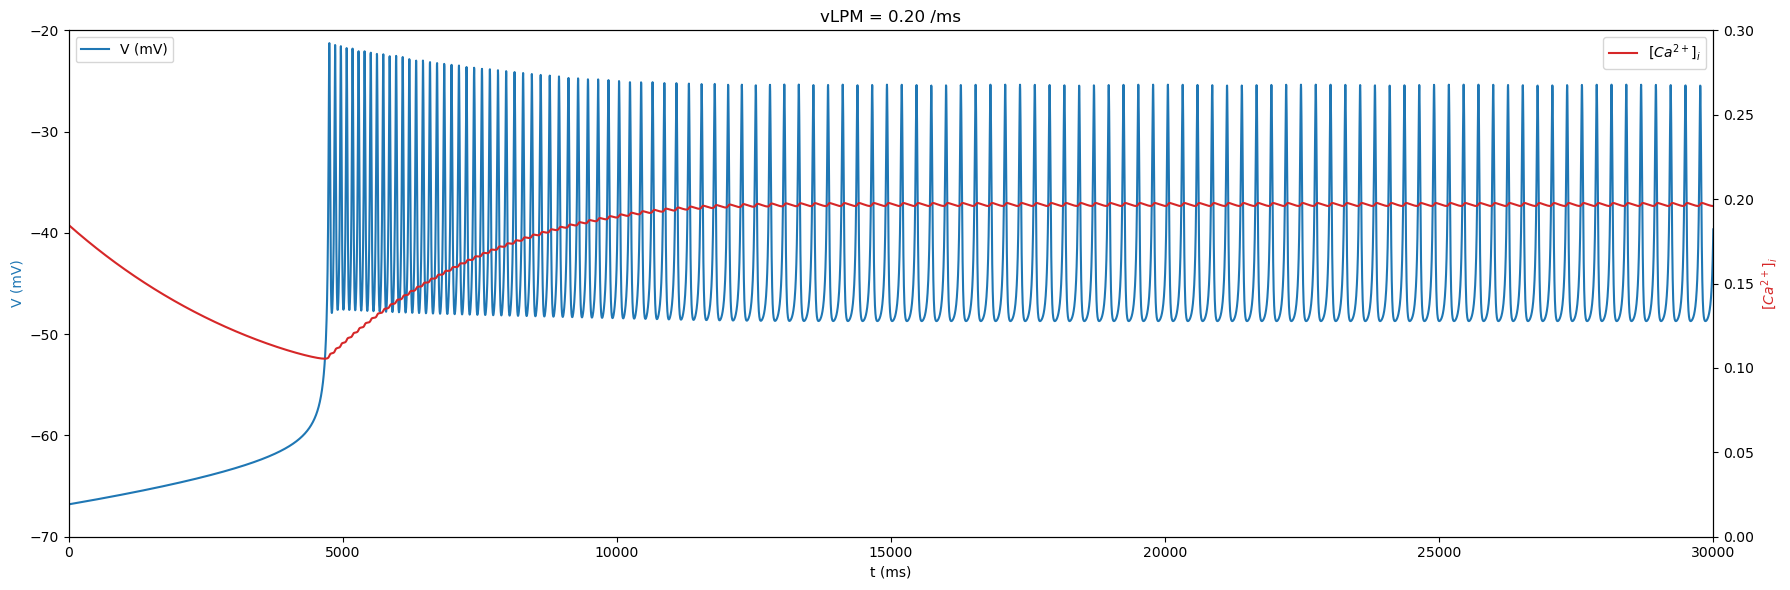

In [456]:
vLPM = [0.10, 0.15, 0.18, 0.20]
Cai_start = [0.12, 0.2, 0.2, 0.2]
teval = np.linspace(0, 30000, 10000)
for i in range(len(vLPM)):
    param_dict["vLPM"] = vLPM[i]
    sol=solve_ivp(chay_Keizer, t_span=[-500, 30000], y0 =[-60, 0.5, Cai_start[i]], t_eval=teval, method="RK45", dense_output=True, args=(param_dict,), rtol=1e-7, atol=1e-7)
    print(sol.message)
    fig, (ax1) = plt.subplots(1, 1, figsize=(18, 6))
    col="tab:blue"
    ax1.plot(sol.t, sol.y[0, :], label="V (mV)", color=col)
    ax1.set_xlabel("t (ms)")
    ax1.set_ylabel("V (mV)", color=col)
    ax1.set_ylim(-70, -20)
    col="tab:red"
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    ax2.plot(sol.t, sol.y[2, :], label="$[Ca^{2+}]_i$", color=col)
    ax2.set_ylabel('$[Ca^{2+}]_i$', color=col)  # we already handled the x-label with ax1
    ax2.set_ylim(0, 0.3)
    ax1.legend(loc = "upper left")
    ax2.legend(loc = "upper right")
    ax2.legend()
    ax1.set_xlim(0, 30000)
    ax2.set_xlim(0, 30000)
    plt.title(f"vLPM = {vLPM[i]:.2f} /ms")
    plt.tight_layout()
    plt.savefig(f"vLPM_{vLPM[i]}.png", dpi=300, bbox_inches='tight')
    
plt.show()

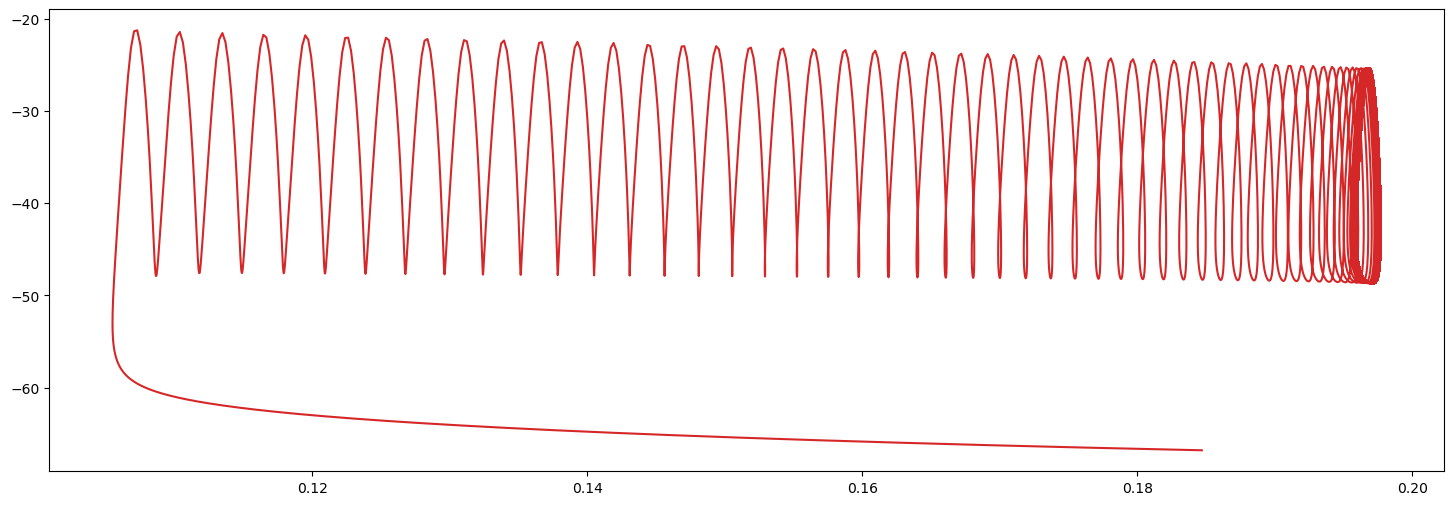

In [179]:
fig, (ax) = plt.subplots(1, 1, figsize=(18, 6))

ax.plot(sol.y[2, :], sol.y[0, :], label="V (mV)", color=col)

C:\Users\adam\AppData\Local\Temp\ipykernel_47356\3855552145.py:9: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  sol = fsolve(CK_fsolve_Cai, [-10,0.9], args=(Cai[i],))
C:\Users\adam\AppData\Local\Temp\ipykernel_47356\3855552145.py:9: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(CK_fsolve_Cai, [-10,0.9], args=(Cai[i],))


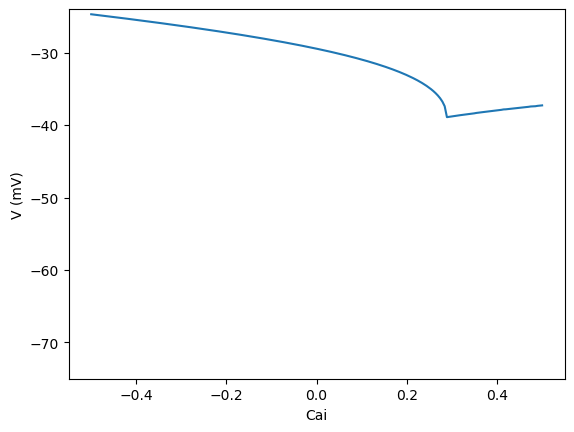

In [3]:
from Function_bank import CK_fsolve_Cai

length = 200
Cai = np.linspace(-0.5, 0.5, length)
V = np.zeros(length)
w = np.zeros(length)

for i in range(len(Cai)):
    sol = fsolve(CK_fsolve_Cai, [-10,0.9], args=(Cai[i],))
    V[i], w[i] = sol
    
fig, ax = plt.subplots()

ax.plot(Cai, V,)
plt.ylim(bottom = -75)

plt.xlabel("Cai")
plt.ylabel("V (mV)")
plt.show()


## Phase portrait w vs V

<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:50: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adam\AppData\Local\Temp\ipykernel_33372\3130610610.py:47: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai), color = "tab:red")
C:\Users\adam\AppData\Local\Temp\ipykernel_33372\3130610610.py:50: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, wdot0, label= "$\dot{w} = 0$; $[Ca^{2+}]_i = $"+ str(Cai), color = "tab:blue")


Fixed points:
[-68.39339339 -44.51951952 -34.90990991] [8.64409055e-05 6.10349610e-03 3.30294125e-02]


Text(0, 0.5, 'w')

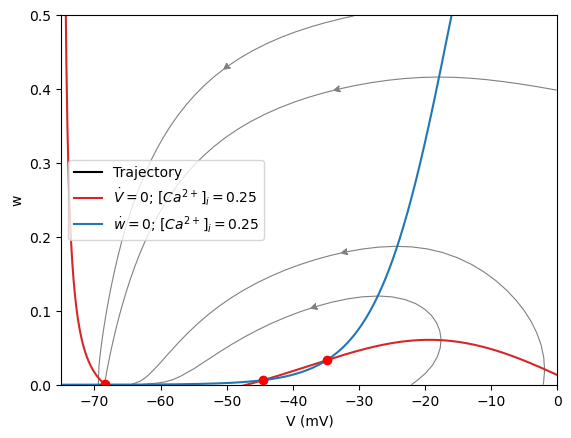

In [132]:
#making the phase portrait
from CK_functions import Vdotzero_CK
from CK_functions import wdotzero # function import isn't working somehow, I'll try to fix it for the real thing
from CK_functions import dVdt
from CK_functions import dwdt
from CK_functions import CK_wV_phase

param_dict["vLPM"] = 0.15
param_dict["Cai"] = 0.25
Cai = param_dict["Cai"]

xmin = -75
xmax = 0
ymin = 0
ymax = 0.5

#creating streamplot
V_mesh = np.arange(xmin, xmax, 0.1)
w_mesh = np.arange(ymin, ymax, 0.001)

VV, ww = np.meshgrid(V_mesh, w_mesh)



Vdot = dVdt(VV, ww, Cai, param_dict)
wdot = dwdt(VV, ww, param_dict)

fig, ax = plt.subplots()

start_points = np.array([[-27, 0.12], [-1, 0.4],[-35,0.49],[-5,0.1]])
ax.streamplot(V_mesh, w_mesh, Vdot, wdot, density=1, linewidth=0.8, arrowsize=1, integration_direction='both', color = "gray", cmap = "Blues", broken_streamlines=False, maxlength=5.0, start_points=start_points, arrowstyle="fancy") #density=0.5, color="gray", linewidth=0.5, arrowsize=1, integration_direction='both', color = "gray", cmap = "Blues"
#start_points=None, maxlength=4.0, integration_direction='both', broken_streamlines=True

teval = np.linspace(800, 1000, 200)
#plotting trajectory
sol=solve_ivp(CK_wV_phase, t_span=[0, 1000], y0 =[-27, 0.12], args=(param_dict,), t_eval=teval, max_step = 0.05, rtol = 1e-6, atol = 1e-6)
ax.plot(sol.y[0,:], sol.y[1, :], "k", label = f"Trajectory")


#plotting nullclines
V = np.linspace(xmin, xmax, 1000)

wdot0 = wdotzero(V, param_dict)
Vdot0= Vdotzero_CK(V, Cai, param_dict)


ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai), color = "tab:red")


ax.plot(V, wdot0, label= "$\dot{w} = 0$; $[Ca^{2+}]_i = $"+ str(Cai), color = "tab:blue")
#finding fixed points
idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
print("Fixed points:")
print(V[idx], wdot0[idx])
ax.plot(V[idx], Vdot0[idx], 'ro')
ax.set_ylim(top = ymax, bottom = ymin)
ax.set_xlim(left = xmin, right = xmax)
ax.legend()


plt.xlabel("V (mV)")
plt.ylabel("w")



<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adam\AppData\Local\Temp\ipykernel_33372\1471723976.py:20: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai))
C:\Users\adam\AppData\Local\Temp\ipykernel_33372\1471723976.py:23: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, wdot0, label= "$\dot{w} = 0$; $[Ca^{2+}]_i = $"+ str(Cai))


Fixed points:
[-26.35135135] [0.13605433]


c:\Users\adam\Documents\_Uni\_year3\Computing\Prototype\CK_functions.py:259: RuntimeWarning: divide by zero encountered in divide
  w = (-I_Ca(V,param_dict) - I_L(V,param_dict) - I_KCa(V, Cai, param_dict)) / ( g_K * ( V - V_K))


Text(0, 0.5, 'w')

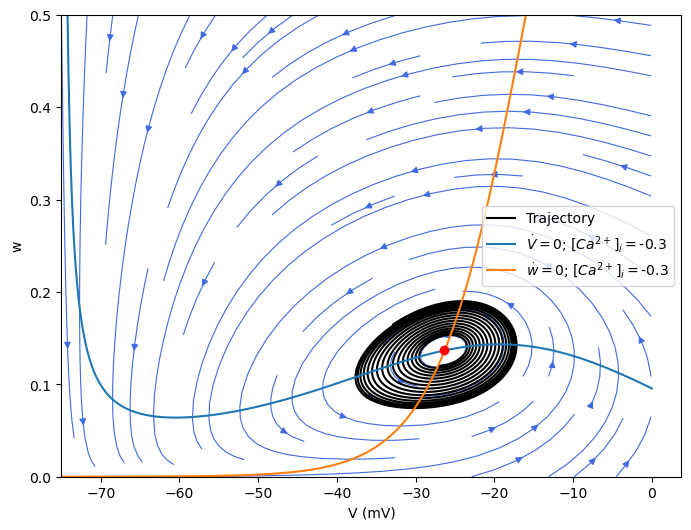

In [52]:
# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Streamplot with lower density
ax.streamplot(V_mesh, w_mesh, Vdot, wdot, density=0.8, color="royalblue", linewidth=0.8)

#plotting trajectory
sol=solve_ivp(CK_wV_phase, t_span=[0, 800], y0 =[-27, 0.12], args=(param_dict,), max_step = 0.05, rtol = 1e-6, atol = 1e-6)
ax.plot(sol.y[0,:], sol.y[1, :], "k", label = f"Trajectory")



#plotting nullclines
V = np.linspace(xmin, xmax, 1000)

wdot0 = wdotzero(V, param_dict)
Vdot0= Vdotzero_CK(V, Cai, param_dict)


ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai))


ax.plot(V, wdot0, label= "$\dot{w} = 0$; $[Ca^{2+}]_i = $"+ str(Cai))
#finding fixed points
idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
print("Fixed points:")
print(V[idx], wdot0[idx])
ax.plot(V[idx], Vdot0[idx], 'ro')

ax.legend()
plt.ylim(top = ymax, bottom = ymin)

plt.xlabel("V (mV)")
plt.ylabel("w")


<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adam\AppData\Local\Temp\ipykernel_33372\67846120.py:43: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai), color = "red")
C:\Users\adam\AppData\Local\Temp\ipykernel_33372\67846120.py:46: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, wdot0, label= "$\dot{w} = 0$", color = "blue")


Fixed points:
[-67.26726727 -48.72372372 -33.18318318] [0.00010569 0.00289024 0.04442862]


Text(0, 0.5, 'w')

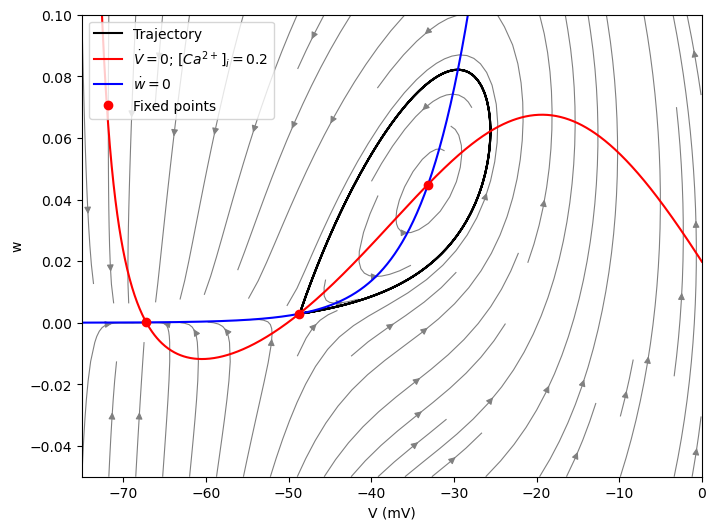

In [484]:
param_dict["vLPM"] = 0.15
param_dict["Cai"] = 0.2
Cai = param_dict["Cai"]

xmin = -75
xmax = 0
ymin = -0.05
ymax = 0.1

#creating streamplot
V_mesh = np.arange(xmin, xmax, 0.1)
w_mesh = np.arange(ymin, ymax, 0.001)

VV, ww = np.meshgrid(V_mesh, w_mesh)



Vdot = dVdt(VV, ww, Cai, param_dict)
wdot = dwdt(VV, ww, param_dict)



# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Streamplot with lower density
ax.streamplot(V_mesh, w_mesh, Vdot, wdot, density=0.8, color="gray", linewidth=0.8)

teval = np.linspace(9000, 10000, 1000)
#plotting trajectory
sol=solve_ivp(CK_wV_phase, t_span=[0, 10000], y0 =[-30, 0.05], args=(param_dict,), max_step = 0.05, rtol = 1e-6, atol = 1e-6, t_eval=teval)
ax.plot(sol.y[0,:], sol.y[1, :], "k", label = f"Trajectory")



#plotting nullclines
V = np.linspace(xmin, xmax, 1000)

wdot0 = wdotzero(V, param_dict)
Vdot0= Vdotzero_CK(V, Cai, param_dict)


ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai), color = "red")


ax.plot(V, wdot0, label= "$\dot{w} = 0$", color = "blue")
#finding fixed points
idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
print("Fixed points:")
print(V[idx], wdot0[idx])
ax.plot(V[idx], Vdot0[idx], 'ro', label = "Fixed points")

ax.legend()
plt.ylim(top = ymax, bottom = ymin)
plt.xlim(left = xmin, right = xmax)

plt.xlabel("V (mV)")
plt.ylabel("w")


<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adam\AppData\Local\Temp\ipykernel_65652\1790376179.py:43: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai))
C:\Users\adam\AppData\Local\Temp\ipykernel_65652\1790376179.py:46: SyntaxWarning: invalid escape sequence '\d'
  ax.plot(V, wdot0, label= "$\dot{w} = 0$; $[Ca^{2+}]_i = $"+ str(Cai))
c:\Users\adam\Documents\_Uni\_year3\Computing\Prototype\CK_functions.py:259: RuntimeWarning: divide by zero encountered in divide
  w = (-I_Ca(V,param_dict) - I_L(V,param_dict) - I_KCa(V, Cai, param_dict)) / ( g_K * ( V - V_K))


Fixed points:
[-25.15015015] [0.16328923]
Fixed points:
[-26.35135135] [0.13605433]
Fixed points:
[-27.77777778] [0.10878865]
Fixed points:
[-29.5045045] [0.08229855]
Fixed points:
[-65.31531532 -53.37837838 -31.98198198] [0.00014976 0.00126085 0.05447877]
Fixed points:
[-69.21921922] [7.45898144e-05]


Text(0, 0.5, 'w')

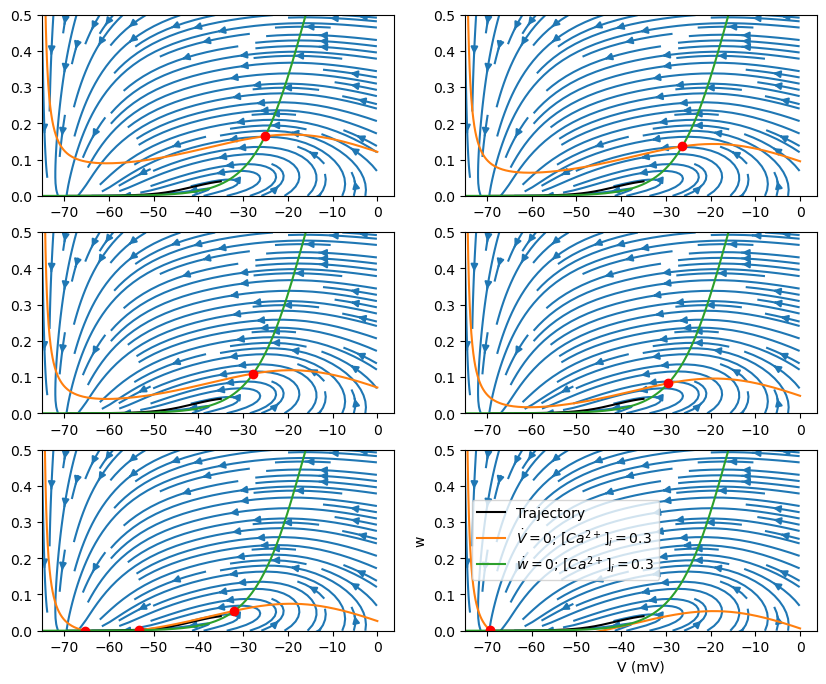

In [ ]:
xmin = -75
xmax = 0
ymin = 0
ymax = 0.5


def create_streamplot(Cai, param_dict):
    param_dict["Cai"] = Cai
    #creating streamplot
    V_mesh = np.arange(xmin, xmax, 0.1)
    w_mesh = np.arange(ymin, ymax, 0.001)

    VV, ww = np.meshgrid(V_mesh, w_mesh)



    Vdot = dVdt(VV, ww, Cai, param_dict)
    wdot = dwdt(VV, ww, param_dict)
    return V_mesh, w_mesh, Vdot, wdot

Cai_array = [-0.45, -0.3, -0.15, 0 , 0.15, 0.3, 0.45]
#plot for different Cai
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flat):
    Cai = Cai_array[i]
    param_dict["Cai"] = Cai_array[i]
    
    V_mesh, w_mesh, Vdot, wdot = create_streamplot(0.3, param_dict)
    ax.streamplot(V_mesh, w_mesh, Vdot, wdot, density=1)

    sol=solve_ivp(CK_wV_phase, t_span=[0, 1000], y0 =[-35, 0.04], args=(param_dict,), max_step = 0.05, rtol = 1e-6, atol = 1e-6)
    ax.plot(sol.y[0,:], sol.y[1, :], "k", label = f"Trajectory")


    #plotting nullclines
    V = np.linspace(xmin, xmax, 1000)

    wdot0 = wdotzero(V, param_dict)
    Vdot0= Vdotzero_CK(V, Cai, param_dict)


    ax.plot(V, Vdot0, label= "$\dot{V} = 0$; $[Ca^{2+}]_i = $" + str(Cai))


    ax.plot(V, wdot0, label= "$\dot{w} = 0$; $[Ca^{2+}]_i = $"+ str(Cai))
    #finding fixed points
    idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
    print("Fixed points:")
    print(V[idx], wdot0[idx])
    ax.plot(V[idx], Vdot0[idx], 'ro')
    ax.set_ylim(top = ymax, bottom = ymin)

ax.legend()


plt.xlabel("V (mV)")
plt.ylabel("w")



## bifurcation diagram



C:\Users\adam\AppData\Local\Temp\ipykernel_30620\3564400209.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  sol = fsolve(CK_bifurcation, start_coord, args=(param_dict, Cai_array[i]))
C:\Users\adam\AppData\Local\Temp\ipykernel_30620\3564400209.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(CK_bifurcation, start_coord, args=(param_dict, Cai_array[i]))


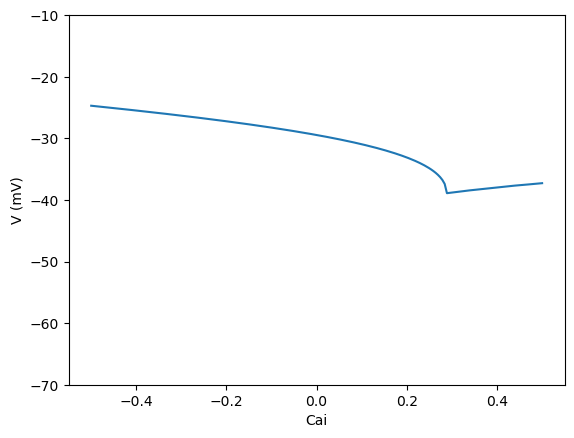

In [38]:
from CK_functions import Bifurcation_VCai
from CK_functions import CK_fsolve
from CK_functions import CK_bifurcation


param_dict["vLPM"] = 0.13

length = 200
Cai_array = np.linspace(-0.5, 0.5, length)
V_array = np.zeros(length)
w = np.zeros(length)
start_coord = [-20, 0]

for i in range(length):
    sol = fsolve(CK_bifurcation, start_coord, args=(param_dict, Cai_array[i]))
    V_array[i], w[i] = sol
    start_coord = sol
    
fig, ax = plt.subplots()

ax.plot(Cai_array, V_array,)
plt.ylim(top = -10, bottom = -70)

plt.xlabel("Cai")
plt.ylabel("V (mV)")
plt.show()

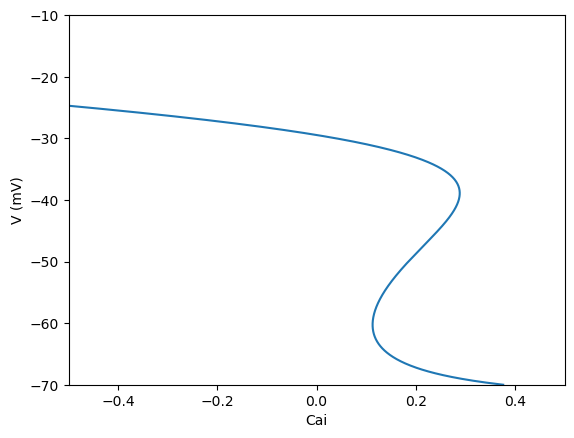

In [407]:
from CK_functions import Bifurcation_VCai


param_dict["vLPM"] = 0.13

length = 2000
V_array = np.linspace(30, -70, length)
Cai_array = np.zeros(length)
w = np.zeros(length)
start_coord = [0.5,-0.5]

for i in range(length):
    sol = fsolve(Bifurcation_VCai, start_coord, args=(param_dict, V_array[i]), )
    start_coord = sol
    w[i], Cai_array[i] = sol
    
fig, ax = plt.subplots()

ax.plot(Cai_array, V_array,)
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = -0.5, right = 0.5)

plt.xlabel("Cai")
plt.ylabel("V (mV)")
plt.show()

In [405]:
stability = np.zeros(length)


for i in range(length):
    J=optimize.approx_fprime([w[i], Cai_array[i]], Bifurcation_VCai, [1e-6, 1e-6], param_dict, V_array[i])

    eigenvalues, eigenvectors = LA.eig(J)
    
    if np.real(eigenvalues[0])>=0:
        stability[i] = 1

print(stability)

#index_change = np.where(stability == 1)

#index_array = index_change[0]

#split_Cai_array = np.split(Cai_array, [index_array[0], index_array[-1]])
#split_V_array = np.split(V_array, [index_array[0], index_array[-1]])



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [408]:
from CK_functions import CK_bifurcation
index = 100
print(len(Cai_array))
stability = np.zeros(length)

J=optimize.approx_fprime([V_array[index], w[index]], CK_bifurcation,[1e-7,1e-7], param_dict, Cai_array[index])

eigenvalues, eigenvectors = LA.eig(J)
print(eigenvalues)

for i in range(length):
    J=optimize.approx_fprime([V_array[i], w[i]], CK_bifurcation, [1e-7,1e-7], param_dict, Cai_array[i])

    eigenvalues, eigenvectors = LA.eig(J)
    
    if np.real(eigenvalues[0])>=0:
        stability[i] = 1

print(stability.shape)

index_change = np.where(stability == 1)

index_array = index_change[0]

split_Cai_array = np.split(Cai_array, [index_array[0], index_array[-1]])
split_V_array = np.split(V_array, [index_array[0], index_array[-1]])
print(split_Cai_array[0].shape)
print(split_Cai_array[1].shape)
print(split_Cai_array[2].shape)



2000
[-0.17340591 -0.12286729]
(2000,)
(1098,)
(706,)
(196,)


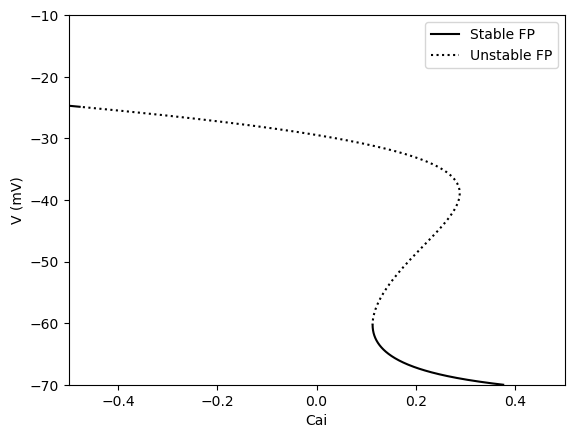

The change from stable to unstable fixed point happens roughly at (V, w, Cai) (-24.927463731865927, 0.16879521637260336, -0.4713004230605405)
The change from unstable to stable fixed point happens roughly at (V, w, Cai) (-60.24512256128064, 0.000370267411694436, 0.11277955332749066)
An example of eigenvalues: [-0.0351913  -0.19651824]


In [409]:
fig, ax = plt.subplots()

ax.plot(split_Cai_array[0], split_V_array[0],"k", label= "Stable FP")
ax.plot(split_Cai_array[1], split_V_array[1], ":k", label="Unstable FP")
ax.plot(split_Cai_array[2], split_V_array[2], "k")
ax.legend()
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = -0.5, right = 0.5)

plt.xlabel("Cai")
plt.ylabel("V (mV)")
plt.show()

print(f"The change from stable to unstable fixed point happens roughly at (V, w, Cai) ({V_array[index_array[0]]}, {w[index_array[0]]}, {Cai_array[index_array[0]]})")
print(f"The change from unstable to stable fixed point happens roughly at (V, w, Cai) ({V_array[index_array[-1]]}, {w[index_array[-1]]}, {Cai_array[index_array[-1]]})")
print(f"An example of eigenvalues: {eigenvalues}")

In [398]:
print(split_Cai_array[0][-1], split_V_array[0][-1])
print(split_Cai_array[0][-2], split_V_array[0][-2])

-0.4855769246482698 -24.81852315394243
-0.5021246537647032 -24.693366708385483


In [410]:
Cai_limit_cyc = np.linspace(-0.48, 0.12, 50)
max_V = np.zeros(len(Cai_limit_cyc))
min_V = np.zeros(len(Cai_limit_cyc))
start_coord = [-25.2, 0.16]
teval = np.linspace(5000, 10000, 3000)

for index, i in enumerate(Cai_limit_cyc):
    param_dict["Cai"] = i
    Cai = i
    sol=solve_ivp(CK_wV_phase, t_span=[0, 10000], y0 =start_coord, args=(param_dict,), rtol = 1e-6, atol = 1e-6, t_eval=teval, method="RK45", dense_output=False,)
    V_array = sol.y[0,:]
    max_V[index] = np.max(V_array)
    min_V[index] = np.min(V_array)

    #plotting nullclines
    V = np.linspace(xmin, xmax, 200)

    wdot0 = wdotzero(V, param_dict)
    Vdot0= Vdotzero_CK(V, Cai, param_dict)
    idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
    
    start_coord = [V[idx][0], wdot0[idx][0]]
    
    
print(max_V)
print(min_V)

c:\Users\adam\Documents\_Uni\_year3\Computing\Prototype\CK_functions.py:259: RuntimeWarning: divide by zero encountered in divide
  w = (-I_Ca(V,param_dict) - I_L(V,param_dict) - I_KCa(V, Cai, param_dict)) / ( g_K * ( V - V_K))


[-23.91361554 -23.88201746 -20.92693594 -19.98483643 -19.33167327
 -18.80104726 -18.37978456 -18.03019793 -17.73637551 -17.48718867
 -17.2754456  -17.09588453 -16.94409475 -16.8168717  -16.7117353
 -16.62644788 -16.55945802 -16.50940299 -16.47511966 -16.45570187
 -16.45030016 -16.45826812 -16.47910562 -16.51232073 -16.55757365
 -16.61455849 -16.68313492 -16.7628932  -16.85405249 -16.95623154
 -17.06969488 -17.19435027 -17.33038124 -17.47786903 -17.63781507
 -17.80823457 -17.99168427 -18.18782422 -18.39839576 -18.6201852
 -18.85758466 -19.11039808 -19.37879353 -19.66427346 -19.9680874
 -20.29404967 -20.63625515 -21.00412726 -21.39749342 -21.81907323]
[-25.83631299 -26.05140017 -29.54906145 -30.9085582  -31.96241934
 -32.88368882 -33.68522683 -34.40927041 -35.07263556 -35.68749676
 -36.26175242 -36.80145059 -37.31154581 -37.79567231 -38.25685152
 -38.69767031 -39.12011359 -39.52571742 -39.91612165 -40.29240109
 -40.65569601 -41.00690133 -41.34683136 -41.67611771 -41.99547283
 -42.3053749

In [109]:
zoom_limit_cyc = np.linspace(-0.48, -0.4, 50)
max_V_zoom = np.zeros(len(zoom_limit_cyc))
min_V_zoom = np.zeros(len(zoom_limit_cyc))

start_coord = [-25.2, 0.16]

t_eval = np.linspace(5000, 10000, 3000)
for index, i in enumerate(zoom_limit_cyc):
    param_dict["Cai"] = i
    Cai = i
    sol=solve_ivp(CK_wV_phase, t_span=[0, 10000], y0 =start_coord, args=(param_dict,), rtol = 1e-6, atol = 1e-6, t_eval=t_eval, method="RK45", dense_output=False,)
    V_array = sol.y[0,:]
    max_V_zoom[index] = np.max(V_array)
    min_V_zoom[index] = np.min(V_array)

    #plotting nullclines
    V = np.linspace(xmin, xmax, 200)

    wdot0 = wdotzero(V, param_dict)
    Vdot0= Vdotzero_CK(V, Cai, param_dict)
    idx = np.argwhere(np.diff(np.sign(Vdot0 - wdot0))).flatten()
    
    start_coord = [V[idx][0], wdot0[idx][0]]


c:\Users\adam\Documents\_Uni\_year3\Computing\Prototype\CK_functions.py:259: RuntimeWarning: divide by zero encountered in divide
  w = (-I_Ca(V,param_dict) - I_L(V,param_dict) - I_KCa(V, Cai, param_dict)) / ( g_K * ( V - V_K))


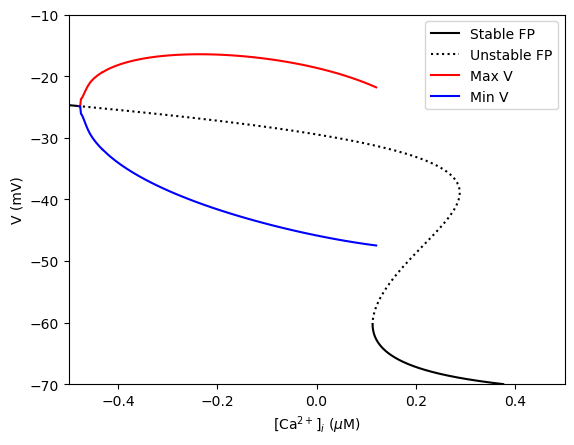

In [411]:
fig, ax = plt.subplots()

ax.plot(split_Cai_array[0], split_V_array[0],"k", label= "Stable FP")
ax.plot(split_Cai_array[1], split_V_array[1], ":k", label="Unstable FP")
ax.plot(split_Cai_array[2], split_V_array[2], "k")

ax.plot(Cai_limit_cyc[4:], max_V[4:], "r", label="Max V")
ax.plot(Cai_limit_cyc[4:], min_V[4:], "b", label="Min V")
ax.plot(zoom_limit_cyc[1:30], max_V_zoom[1:30], "r",)
ax.plot(zoom_limit_cyc[1:30], min_V_zoom[1:30], "b",)

ax.legend()
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = -0.5, right = 0.5)

plt.xlabel(r"[Ca$^{2+}$]$_i$ ($\mu$M)")
plt.ylabel("V (mV)")
plt.show()

In [451]:
teval = np.linspace(10000, 25000, 10000)
param_dict["vLPM"] = 0.13
sol=solve_ivp(chay_Keizer, t_span=[-500, 40000], y0 =[-60, 0.5, 0.1], t_eval=teval, method="RK45", dense_output=True, args=(param_dict,), rtol=1e-7, atol=1e-7)


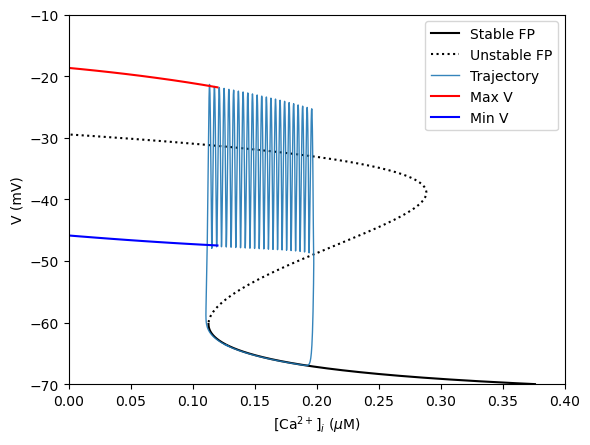

In [452]:
fig, ax = plt.subplots()

ax.plot(split_Cai_array[0], split_V_array[0],"k", label= "Stable FP")
ax.plot(split_Cai_array[1], split_V_array[1], ":k", label="Unstable FP")
ax.plot(split_Cai_array[2], split_V_array[2], "k")
ax.plot(sol.y[2, :], sol.y[0, :], label="Trajectory", color = "tab:blue", alpha = 0.9, linewidth = 1)


ax.plot(Cai_limit_cyc[4:], max_V[4:], "r", label="Max V")
ax.plot(Cai_limit_cyc[4:], min_V[4:], "b", label="Min V")
ax.plot(zoom_limit_cyc[1:30], max_V_zoom[1:30], "r",)
ax.plot(zoom_limit_cyc[1:30], min_V_zoom[1:30], "b",)

ax.legend()
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = 0, right = 0.4)

plt.xlabel(r"[Ca$^{2+}$]$_i$ ($\mu$M)")
plt.ylabel("V (mV)")
plt.show()

In [297]:
path = sol.y[0, :]
Ca_path = sol.y[2, :]
mask1 = path > - 50
print(mask1)
path50 = path[mask1]
Ca_path50 = Ca_path[mask1]
print(path50)
mask2 = path50 > -27
path20 = path50[mask2]
Ca_path20 = Ca_path50[mask2]

print(path20)
mask3 = path50 < -45
path45 = path50[mask3]
Ca_path45 = Ca_path50[mask3]
print(path45.shape)


[False False False ... False False False]
[-49.87706918 -49.7355976  -49.59007499 ... -49.93732966 -49.95969728
 -49.98252197]
[-26.98292098 -25.92927571 -24.9186351  -23.97956922 -23.14263764
 -22.43794196 -21.89231162 -21.52656637 -21.35351423 -21.37701766
 -21.59221431 -21.98677199 -22.5427367  -23.23863686 -24.05147384
 -24.95834865 -25.93764048 -26.96972331 -26.65744813 -25.66590093
 -24.72726208 -23.86884891 -23.11889518 -22.50417144 -22.04750892
 -21.76557926 -21.66741184 -21.75392245 -22.01840664 -22.44783194
 -23.02458303 -23.72830851 -24.53763517 -25.43152467 -26.39023222
 -26.46917636 -25.51138259 -24.61237174 -23.79877286 -23.09750271
 -22.5335012  -22.12742051 -21.89365917 -21.83918729 -21.96329352
 -22.25821551 -22.71048    -23.30255436 -24.01461224 -24.82607496
 -25.71683857 -26.6681244  -26.8765329  -25.92291878 -25.01855674
 -24.18857716 -23.45907674 -22.85503937 -22.39814813 -22.10474929
 -21.98441505 -22.03936432 -22.26473089 -22.64959903 -23.17848065
 -23.83297165 -

path 20 
index
8
26
43
60
77
93
110


In [277]:
533-479

54

path45
index
80
118
159
200
243
287



480
533




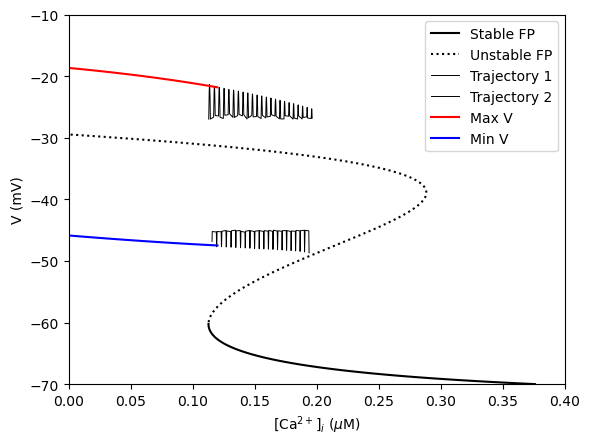

In [291]:
fig, ax = plt.subplots()

ax.plot(split_Cai_array[0], split_V_array[0],"k", label= "Stable FP")
ax.plot(split_Cai_array[1], split_V_array[1], ":k", label="Unstable FP")
ax.plot(split_Cai_array[2], split_V_array[2], "k")
#ax.plot(sol.y[2, :], sol.y[0, :], label="Trajectory", color = "tab:blue", alpha = 0.9, linewidth = 1)

ax.plot(Ca_path20, path20, "k", label="Trajectory 1", linewidth = 0.7,)
ax.plot(Ca_path45[55:1310], path45[55:1310], "k", label="Trajectory 2", linewidth = 0.7,)

ax.plot(Cai_limit_cyc[4:], max_V[4:], "r", label="Max V")
ax.plot(Cai_limit_cyc[4:], min_V[4:], "b", label="Min V")
ax.plot(zoom_limit_cyc[1:30], max_V_zoom[1:30], "r", )
ax.plot(zoom_limit_cyc[1:30], min_V_zoom[1:30], "b",)

ax.legend()
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = 0, right = 0.4)

plt.xlabel(r"[Ca$^{2+}$]$_i$ ($\mu$M)")
plt.ylabel("V (mV)")
plt.show()

In [271]:
print(len(path20)/17)

#subdivide path20 every 17 points
path20_split = np.array_split(path20, 17)
Ca_path20_split = np.array_split(Ca_path20, 17)
print(path20_split[1])
#find maximum of each subdivision
max_path20 = np.zeros(len(path20_split))
max_Ca_path20 = np.zeros(len(path20_split))
for i in range(len(path20_split)):
    max_path20[i] = np.max(path20_split[i])
    max_Ca_path20[i] = Ca_path20_split[i][np.argmax(path20_split[i])]
    
print(max_path20.shape)
print(max_Ca_path20.shape)

21.11764705882353
[-23.11889518 -22.50417144 -22.04750892 -21.76557926 -21.66741184
 -21.75392245 -22.01840664 -22.44783194 -23.02458303 -23.72830851
 -24.53763517 -25.43152467 -26.39023222 -26.46917636 -25.51138259
 -24.61237174 -23.79877286 -23.09750271 -22.5335012  -22.12742051
 -21.89365917 -21.83918729]
(17,)
(17,)


In [309]:
#used chatgpt for this line of code
maxima_indises = np.where((path20[1:-1] > path20[:-2]) & (path20[1:-1] > path20[2:]))[0] + 1
max_path20 = np.zeros(len(maxima_indises))
max_Ca_path20 = np.zeros(len(maxima_indises))
for i in range(len(maxima_indises)):
    max_path20[i] = path20[maxima_indises[i]]
    max_Ca_path20[i] = Ca_path20[maxima_indises[i]]
print(max_path20.shape)

(23,)


In [301]:
# Identify local minima (a point is a local minimum if it's smaller than its neighbors)
values = path45[55:1310]
Ca_values = Ca_path45[55:1310]
minima_indices = np.where((values[1:-1] < values[:-2]) & (values[1:-1] < values[2:]))[0] + 1
print(minima_indices)
min_path45 = np.zeros(len(minima_indices))
min_Ca_path45 = np.zeros(len(minima_indices))
for i in range(len(minima_indices)):
    min_path45[i] = values[minima_indices[i]]
    min_Ca_path45[i] = Ca_values[minima_indices[i]]
print(min_path45.shape)
print(min_Ca_path45.shape)

[  25   63  104  145  188  232  277  324  374  425  478  534  593  655
  720  790  864  945 1034 1134 1253]
(21,)
(21,)


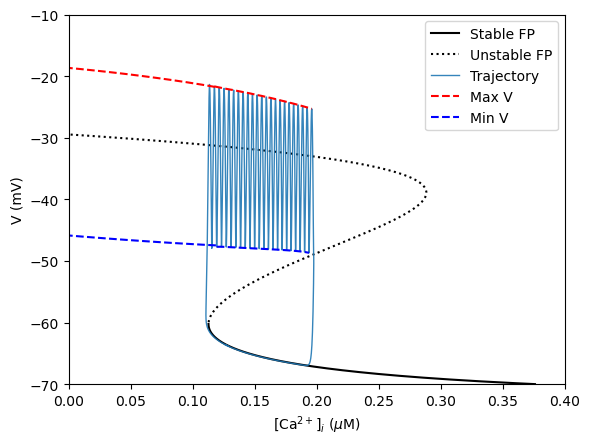

In [453]:
fig, ax = plt.subplots()

ax.plot(split_Cai_array[0], split_V_array[0],"k", label= "Stable FP")
ax.plot(split_Cai_array[1], split_V_array[1], ":k", label="Unstable FP")
ax.plot(split_Cai_array[2], split_V_array[2], "k")
ax.plot(sol.y[2, :], sol.y[0, :], label="Trajectory", color = "tab:blue", alpha = 0.9, linewidth = 1)

ax.plot(max_Ca_path20[1:], max_path20[1:], "r--")
ax.plot(min_Ca_path45, min_path45,"b--")

ax.plot(Cai_limit_cyc[4:], max_V[4:], "r--", label="Max V", markersize = 2)
ax.plot(Cai_limit_cyc[4:], min_V[4:], "b--", label="Min V", markersize = 2)
ax.plot(zoom_limit_cyc[1:30], max_V_zoom[1:30], "r", )
ax.plot(zoom_limit_cyc[1:30], min_V_zoom[1:30], "b",)

ax.legend()
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = 0, right = 0.4)

plt.xlabel(r"[Ca$^{2+}$]$_i$ ($\mu$M)")
plt.ylabel("V (mV)")

plt.savefig("bifurcation_trajectory.png", dpi=300, bbox_inches='tight')

plt.show()

In [420]:
#find maximum of split_Cai_array[1]
maximum = np.max(split_Cai_array[1])
max_index = np.argmax(split_Cai_array[1])




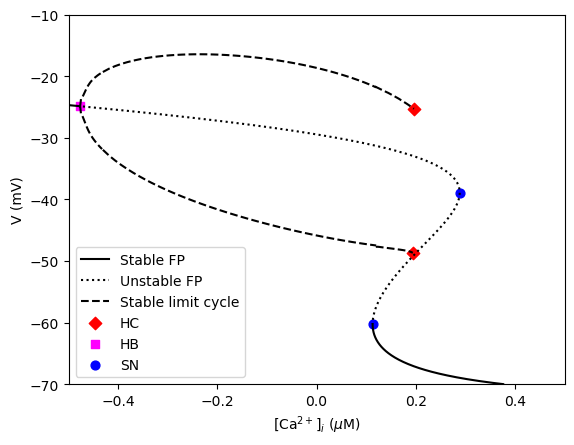

In [449]:
fig, ax = plt.subplots()




ax.plot(split_Cai_array[0], split_V_array[0],"k", label= "Stable FP")
ax.plot(split_Cai_array[1], split_V_array[1], "k:", label="Unstable FP")
ax.plot(split_Cai_array[2], split_V_array[2], "k")
#ax.plot(sol.y[2, :], sol.y[0, :], label="Trajectory", color = "tab:blue", alpha = 0.9, linewidth = 1)

ax.plot(max_Ca_path20[1:], max_path20[1:], "k--", )
ax.plot(min_Ca_path45, min_path45, "k--")




ax.plot(Cai_limit_cyc[4:], max_V[4:], "k--", label="Stable limit cycle")
ax.plot(Cai_limit_cyc[4:], min_V[4:], "k--",)
ax.plot(zoom_limit_cyc[1:30], max_V_zoom[1:30], "k--", )
ax.plot(zoom_limit_cyc[1:30], min_V_zoom[1:30], "k--")

#plotting homoclinic orbit points
ax.scatter(max_Ca_path20[-1], max_path20[-1], marker = "D", s = 40, label = "HC", facecolors="r", edgecolors="r")
ax.scatter(min_Ca_path45[-1], min_path45[-1], marker = "D", s = 40, facecolors="r", edgecolors="r")

ax.scatter(split_Cai_array[0][-1], split_V_array[0][-1], color = "#000000", marker = "s", s = 40, label = "HB", facecolors="fuchsia", edgecolors="fuchsia")
ax.scatter(split_Cai_array[2][0], split_V_array[2][0], color = "#000000", marker = "o", s = 40, facecolors="b", edgecolors="b")
ax.scatter(maximum, split_V_array[1][max_index], color = "#000000", marker = "o", s = 40, facecolors="b", edgecolors="b", label = "SN")


ax.legend()
plt.ylim(top = -10, bottom = -70)
plt.xlim(left = -0.5, right = 0.5)



plt.xlabel(r"[Ca$^{2+}$]$_i$ ($\mu$M)")
plt.ylabel("V (mV)")
plt.savefig("homoclinic.png", dpi=300, bbox_inches='tight')

plt.show()